<a href="https://colab.research.google.com/github/kimpitang/AI-Agent/blob/main/%EA%B8%B0%EB%B3%B8%EC%A0%81%EC%9D%B8_%EA%B7%B8%EB%9E%98%ED%94%84_%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.3 MB/s eta 0:00:00


In [9]:
import os
os.environ['OPENAI_API_KEY'] = "" # 개인 API KEY

# StateGraph로 상태 만들기

In [10]:
from typing import TypedDict
from langgraph.graph import StateGraph

class State(TypedDict):
    counter: int
    alphabet: list[str]

graph_builder = StateGraph(State)

In [12]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END
import operator

class State(TypedDict):
    counter: int
    alphabet: list[str]

def node_a(state: State):
    state['counter'] += 1
    state['alphabet'] = ["Hello"]
    return state

graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", node_a)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

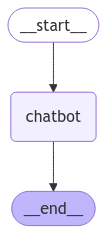

In [13]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  # This requires some extra dependencies and is optional
  pass

In [15]:
# 초기 상태 정의
initial_state = {
    "counter": 0,
    "alphabet": []
}

state = initial_state

for _ in range(3):
    state = graph.invoke(state)
    print(state)

{'counter': 1, 'alphabet': ['Hello']}
{'counter': 2, 'alphabet': ['Hello']}
{'counter': 3, 'alphabet': ['Hello']}


In [16]:
class State(TypedDict):
    counter: int
    alphabet: Annotated[list[str], operator.add]

def node_a(state: State):
    state['counter'] += 1
    state['alphabet'] = ["Hello"]
    return state

graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", node_a)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

In [17]:
# 초기 상태 정의
initial_state = {
    "counter": 0,
    "alphabet": []
}

state = initial_state

for _ in range(3):
    state = graph.invoke(state)
    print(state)

{'counter': 1, 'alphabet': ['Hello']}
{'counter': 2, 'alphabet': ['Hello', 'Hello']}
{'counter': 3, 'alphabet': ['Hello', 'Hello', 'Hello']}


# Message를 담은 StateGraph 만들기

In [20]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.32
    Uninstalling langchain-core-0.3.32:
      Successfully uninstalled langchain-core-0.3.32


In [23]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot(state: State):
  return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

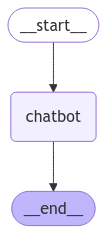

In [24]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  # This requires some extra dependencies and is optional
  pass

In [26]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "exit", "q"]:
    print("Goodbye!")
    break
  for event in graph.stream({"messages": ("user", user_input)}):
    for value in event.values():
      print("Assistant:", value["messages"][-1].content)

User: 안녕
Assistant: 안녕하세요! 어떻게 도와드릴까요?
User: 오늘 한파주의보라는데 어떻게 해야 따뜻하게 지낼 수 있을까?
Assistant: 한파주의보가 발효된 날에는 따뜻하게 지내기 위해 몇 가지 팁이 있습니다:

1. **따뜻한 옷 착용**: 여러 겹의 옷을 입어 체온을 유지하세요. 특히, 모자, 장갑, 목도리 등으로 몸의 노출 부분을 보호하는 것이 중요합니다.

2. **온열 기구 사용**: 전기장판, 난방기 등을 사용해 실내를 따뜻하게 유지하세요. 난방이 잘 되지 않는 방에서는 담요를 덮어 따뜻하게 지내는 것도 좋은 방법입니다.

3. **따뜻한 음료 섭취**: 따뜻한 차나 육수를 마시는 것이 몸을 데우는 데 도움을 줍니다. 카페인 음료는 피하는 것이 좋습니다.

4. **건강한 식사**: 따뜻한 음식(스프, 찌개 등)을 섭취하여 몸의 열을 유지하세요. 영양가 있는 음식을 섭취하는 것도 중요합니다.

5. **외출 자제**: 가능하면 바깥에 나가는 것을 피하고, 꼭 나가야 한다면 짧은 시간 안에 끝내도록 노력하세요. 외출 시 따뜻한 옷을 착용하는 것도 잊지 마세요.

6. **실내 난방 유지**: 실내 온도를 적정 수준으로 유지하고, 창문과 문을 잘 닫아 외부의 찬 공기가 들어오는 것을 막도록 하세요.

7. **습도 조절**: 공기가 건조해지기 쉬운 겨울철에는 가습기를 사용하여 적절한 습도를 유지하는 것도 도움이 됩니다.

이런 방법들을 활용해 따뜻하고 안전하게 겨울을 보내세요!
User: q
Goodbye!


In [27]:
from langchain_openai import ChatOpenAI
from langgraph.graph import MessagesState

graph_builder = StateGraph(MessagesState)

llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot(state: MessagesState):
  return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

In [28]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "exit", "q"]:
    print("Goodbye!")
    break
  for event in graph.stream({"messages": ("user", user_input)}):
    for value in event.values():
      print("Assistant:", value["messages"][-1].content)

User: 안녕
Assistant: 안녕하세요! 어떻게 도와드릴까요?
User: 삼성전자에 대해서 어떻게 생각해?
Assistant: 삼성전자는 글로벌 전자 및 기술 산업에서 중요한 역할을 하는 기업으로, 다양한 분야에서 활동하고 있습니다. 스마트폰, 반도체, 가전제품, 디스플레이 패널 등 여러 분야에서 세계적인 시장 점유율을 보유하고 있습니다. 특히 반도체 분야에서는 DRAM과 NAND 플래시 메모리 시장에서 뛰어난 경쟁력을 가지고 있습니다.

또한, 삼성전자는 혁신적인 기술 개발에도 많은 투자를 하고 있으며, 5G, 인공지능, IoT(사물인터넷) 등 미래 기술 분야에서도 선도적인 역할을 하고 있습니다. 이러한 기술들은 앞으로의 산업 변화와 발전에 큰 영향을 미칠 것으로 예상됩니다.

하지만 경쟁이 치열한 시장 환경 속에서 지속적인 기술 혁신과 품질 개선이 중요하며, 회사의 경영 방식이나 시장 전략도 끊임없이 검토되고 변화해야 할 것입니다. 삼성전자의 지속 가능한 성장과 글로벌 리더십을 유지하기 위해서는 이러한 도전에 효과적으로 대응하는 것이 필요합니다.
User: q
Goodbye!


In [30]:
from langchain_openai import ChatOpenAI
from langgraph.graph import MessagesState

class State(MessagesState):
  counter: int

graph_builder = StateGraph(State)

llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot(state: State):
  state['counter'] = state.get('counter', 0) + 1
  return {
      "messages": [llm.invoke(state["messages"])],
      "counter": state['counter']
      }

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

In [37]:
from langchain_core.messages import HumanMessage

# 초기 상태 설정
initial_state = {
    "messages": [HumanMessage(content="Hello!")],
    "counter": 0
}

# 그래프 실행
result = graph.invoke(initial_state)
print(f"Final state: {result}")

Final state: {'messages': [HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}, id='7ef7a625-5506-4c02-8423-1938da0e5543'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-acec0221-e190-4bc2-9d15-eceb843d1ba7-0', usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})], 'counter': 1}


In [38]:
state = initial_state

for _ in range(3):
    state = graph.invoke(state)
    print(f"counter: {State['counter']}")
    print(f"Last message: {state['messages'][-1].content}")
    print("---")

counter: __main__.State['counter']
Last message: Hello! How can I assist you today?
---
counter: __main__.State['counter']
Last message: Hello! How can I assist you today?
---
counter: __main__.State['counter']
Last message: Hello! How can I help you today?
---
